In [1]:
# import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
print(torch.__version__)
import helper

import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets, transforms

# Define a transform to normaalize the data


transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean = (0.5,), std = (0.5,)),
                               ])



# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# batch size: images we get in one iteration 


In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
#grabbing the first batch with "next.()"
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


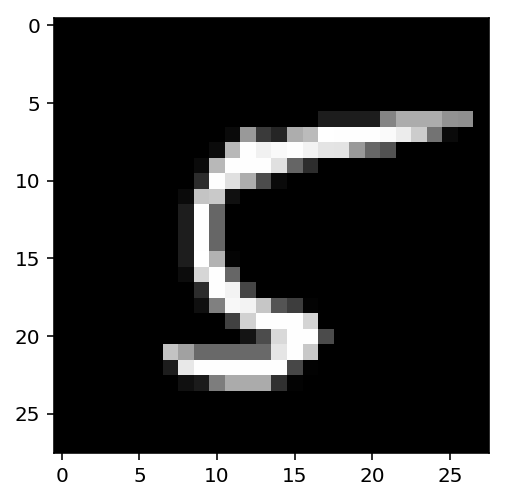

In [10]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [12]:
images[1].flatten().shape

torch.Size([784])

In [13]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [14]:
inputs = images.view(images.shape[0], -1) # 64, 784
# grab the # of batches and flattened vector
print(inputs.shape)

torch.Size([64, 784])


In [35]:
w1 = torch.randn(inputs.shape[1], 256)
#print(w1.shape)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
print(h)
out = activation(torch.mm(h, w2)+ b2)
print(out.shape)

tensor([[9.9998e-01, 9.9988e-01, 8.3809e-20,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [9.3644e-02, 9.9411e-01, 9.9981e-01,  ..., 1.0000e+00, 9.2459e-01,
         1.8411e-01],
        [6.9667e-01, 1.0000e+00, 5.1780e-08,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        ...,
        [3.5103e-21, 9.9999e-01, 1.8186e-18,  ..., 1.0000e+00, 1.6855e-10,
         1.0000e+00],
        [2.5547e-05, 9.9968e-01, 3.0541e-14,  ..., 1.0000e+00, 9.9387e-01,
         1.0000e+00],
        [2.2308e-02, 7.3076e-01, 7.7308e-13,  ..., 1.0000e+00, 6.0558e-02,
         1.0000e+00]])
torch.Size([64, 10])


In [42]:
def softmx(arry):
    deno = 0
    for i in arry:
        deno += i
    return arry/deno
def softMX(mat):
    tmp = []
    for j in range(mat.shape[0]):
        tmp.append(softmx(j))
    return tmp
        

In [43]:
out[0]

tensor([1.6349e-04, 1.2182e-04, 9.9848e-01, 1.0506e-02, 1.8243e-05, 2.4714e-10,
        5.3031e-04, 9.9981e-01, 9.6280e-01, 2.8912e-07])

In [44]:
softmx(out[0])

tensor([5.5001e-05, 4.0984e-05, 3.3591e-01, 3.5345e-03, 6.1375e-06, 8.3145e-11,
        1.7841e-04, 3.3636e-01, 3.2391e-01, 9.7267e-08])

In [63]:
out.shape

torch.Size([64, 10])

In [46]:
## Solution
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1,1)
probabilities = softmax(out)

In [47]:
print(probabilities.shape)

torch.Size([64, 10])


In [48]:
print(probabilities.sum(dim = 1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## <center>[[[[Practice</center>

In [56]:
torch.manual_seed(42)
sp = activation(torch.randn((3,5)))

In [58]:
sp

tensor([[0.5834, 0.5322, 0.5583, 0.5573, 0.2455],
        [0.4536, 0.9010, 0.3457, 0.6134, 0.5664],
        [0.6306, 0.6920, 0.7522, 0.1558, 0.2711]])

In [59]:
torch.exp(sp)

tensor([[1.7921, 1.7026, 1.7478, 1.7460, 1.2782],
        [1.5739, 2.4620, 1.4130, 1.8467, 1.7620],
        [1.8788, 1.9977, 2.1216, 1.1686, 1.3114]])

In [61]:
torch.sum(torch.exp(sp), dim = 1)

tensor([8.2667, 9.0576, 8.4781])

In [62]:
torch.sum(torch.exp(sp), dim = 0)

tensor([5.2448, 6.1623, 5.2824, 4.7613, 4.3517])

In [64]:
torch.sum(torch.exp(sp), dim = 0).view(-1,1)

tensor([[5.2448],
        [6.1623],
        [5.2824],
        [4.7613],
        [4.3517]])

In [66]:
torch.exp(sp)/torch.sum(torch.exp(sp), dim = 1).view(-1,1)

tensor([[0.2168, 0.2060, 0.2114, 0.2112, 0.1546],
        [0.1738, 0.2718, 0.1560, 0.2039, 0.1945],
        [0.2216, 0.2356, 0.2502, 0.1378, 0.1547]])

In [67]:
prob = torch.exp(sp)/torch.sum(torch.exp(sp), dim = 1).view(-1,1)
prob.shape

torch.Size([3, 5])

In [68]:
prob.sum(dim = 1)

tensor([1.0000, 1.0000, 1.0000])

## <center>Pratice]]]]</center>

In [69]:
# Solution
# Build neural network
from torch import nn

In [72]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Inputs to hidden layer linear transformations
        self.hidden = nn.Linear(784, 256)
        #Output layer, 10 units - one for each digit
        self.output = nn.Linear(256,10)
        
        #Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self,x):
        #Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [74]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [75]:
# another solution

import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256,10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim = 1)
        return x

In [76]:
# Assignment: Your Turn to Build a Network
# input784, hidden1 128, hidden2 64, output10 
# relu, relu, softmzx, cross-entropy

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(128,10)
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim = 1)
        return x